# Módulo de Matemáticas 101: reto del fin de semana

El reto de esta semana es implementar el algoritmo de Singular Value Decomposition para comprimir una imagen. Podéis guiaros por lo visto en las clases y os recomiendo también esta web:

https://timbaumann.info/svd-image-compression-demo/

## SVD para comprimir una imagen

El algoritmo de Singular Value Decomposition, del que ya hemos hablado en el módulo, nos puede servir para comprimir una imagen. Vamos a implementar varias funciones para esto. Como repaso, el algoritmo nos devuelve la descomposición de una matriz en tres matrices, una de ellas con los elementos principales y las otras dos con los vectores principales.

Usaremos:

- Una imagen de `scipy.datasets`
- La implementación del algoritmo en `scipy.linalg`: https://docs.scipy.org/doc/scipy-1.14.0/reference/generated/scipy.linalg.svd.html
- La librería `matplotlib`para las gráficas
- El error SSE (sum of squared estimate of errors)


Definición:

$$SSE =  \sum_{i=1}^{n}  (x_{i} -  \widehat{x}_i ) ^2 $$

Donde:

- $x_i$ son los valores de la matriz original X
- $\widehat{x}_i$ son los valores de la matriz reconstruida $\widehat{X}$

Lo primero, vemos la imagen que vamos a comprimir:

In [2]:
!pip install pooch

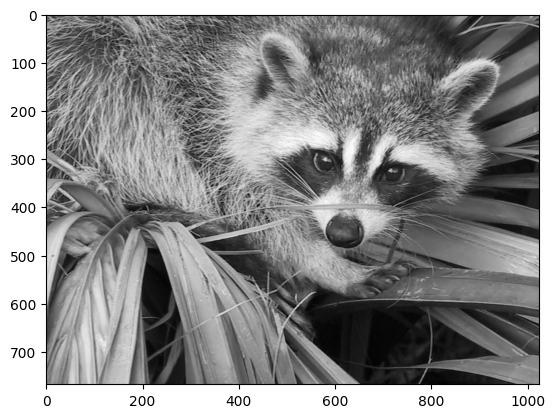

In [3]:
import matplotlib.pyplot as plt
from scipy import datasets
%matplotlib inline

# Load image
A = datasets.face(gray=True)

plt.imshow(A, cmap=plt.cm.gray)

In [4]:
A.shape

(768, 1024)

In [5]:
type(A)

numpy.ndarray

Las siguientes funciones te ayudarán a llegar a la solución final:

### 1. Implementa la función para el SSE
La función debe tener como entrada las dos matrices y como salida un número que será el error cometido.

In [6]:
import numpy as np

def sse_score(X, X_hat):
    return np.sum((X - X_hat)**2)

# Array de prueba
X = np.array([[1, 2], [3, 4]])
X_hat = np.array([[1.01, 1.75], [2.81, 3.99]])
sse = sse_score(X, X_hat)  
print(sse)

0.09879999999999997


### 2. Implementa una función para ejecutar SVD
La función debe tener como entrada una matriz y como salida las tres matrices de la descomposición.

In [11]:
import numpy as np
from scipy.linalg import svd

def svd(X):
     
     svd = np.linalg.svd(X)
     U, S, Vt = svd
     return U, S, Vt
      


### 3. Implementa una función para reconstruir la imagen

Esta función deberá reconstruir la imagen a partir de un set de matrizes (U, S, Vt) dado.

In [13]:
def reconstruction(U, S, Vt):
    return U @ S @ Vt

U = np.array([[-0.40455358, -0.9145143 ],
              [-0.9145143 ,  0.40455358]])
S = np.array([[5.4649857 , 0.        ],
              [0.        , 0.36596619]])
Vt = np.array([[-0.57604844, -0.81741556],
               [ 0.81741556, -0.57604844]])
X_hat = reconstruction(U, S, Vt)
X_hat

array([[0.99999999, 1.99999998],
       [3.00000003, 4.00000001]])

En este punto, ya puedes ver cuál es el error cometido si se reconstruye la matriz inicial directamente después de aplicar SVD.

In [14]:
sse = sse_score(X, X_hat)
print(f"El error de reconstrucción es: {sse}")

El error de reconstrucción es: 1.4715305057493961e-15


### 4. Implementa la compresión

Esta es la parte más complicada. A la función le tendremos que pasar la imagen, en forma matricial, y el número de componentes que queremos usar para la compresión.

La función aplicará SVD y reconstruirá la matriz usando solo los n_comp primeros valores propios de la descomposición. Utilizaremos las tres funciones que acabamos de construir, de esta forma estamos separando nuestro código en partes y nos será más facil encontrar errores en caso de haberlos.

In [24]:
### TODO: Función que recibe una imagen A y devuelve la imagen comprimida
### Tiene como entrada A y el número de componentes para realizar la reducción de dimensionalidad
### Devuelve la imagen comprimidad y el error de reconstrucción
### Utiliza las funciones que hemos creado en este notebook

def image_compression(racoon, n_comp):
    matriz_racoon = np.array(racoon)
    U, S, Vt = svd(matriz_racoon)

    U_k = U[:, :n_comp]
    S_k = np.diag(S[:n_comp])
    Vt_k = Vt[:n_comp, :]

    racoon_hat = reconstruction(U_k, S_k, Vt_k)
    see = sse_score(racoon, racoon_hat)
    return racoon_hat, sse 

    
    

racoon = datasets.face(gray=True)
racoon_hat, sse = image_compression(A, n_comp=50)
print(racoon_hat)
print(sse)


[[102.01035606 107.75448034 114.71819678 ... 149.68887333 151.21805356
  152.32531905]
 [101.18204155 107.63024736 116.21450442 ... 137.76912943 139.70776388
  141.13148986]
 [ 98.2755258  104.70598459 110.28364468 ... 127.86632221 129.3043365
  130.48577595]
 ...
 [101.69554072 102.86909436 111.35976015 ... 140.32539609 141.34393296
  141.79244015]
 [ 98.47842398 100.31532391 109.86719188 ... 139.23840284 140.53857189
  141.15827493]
 [ 95.52769098  97.59223581 107.66727235 ... 138.04350496 139.47562148
  140.17942126]]
195489946.21017024


In [25]:
sse

np.float64(195489946.21017024)

### 5. Gráficas del resultado

Por último, se pide que pruebes para varios valores del número de componentes y grafiques la imagen original junto con varias compresiones. Puedes usar un grid 2x2 de `matplotlib`. Si quieres, también puedes incluir gráficas del error. Comenta el resultado.

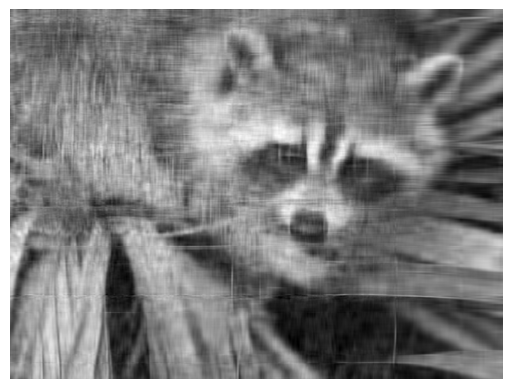

In [138]:
import matplotlib.pyplot as plt

plt.imshow(racoon_hat, cmap = "gray")
plt.axis("off")
plt.show()
racoon_hat, sse = image_compression(A, n_comp=20)







# Repetir para distintas compresiones (distinto n_comp)

## 6. Gráficas del error
Dibuja una gráfica del error respecto al número de componentes elegidas para ver cómo varía

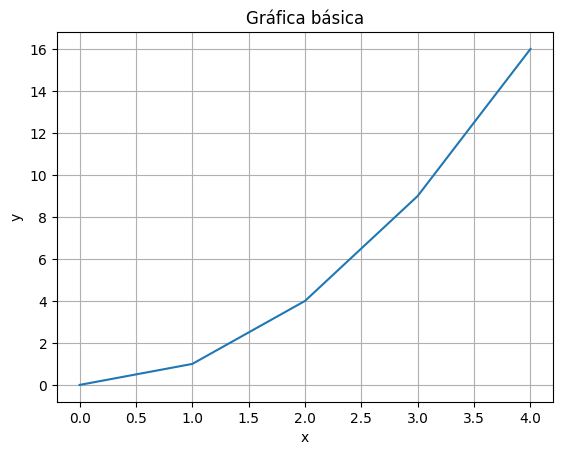

In [142]:
import matplotlib.pyplot as plt

x = [0, 1, 2, 3, 4]
y = [0, 1, 4, 9, 16]

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfica básica")
plt.grid(True)
plt.show()